In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv')

In [3]:
#PASO 1: INSPECCION DE DATOS
train_data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [5]:
test_data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [7]:
#Verificar datos faltantes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
#verificacion si hay valores nulos en los datos
train_data.isnull().sum()
#Los numeros representan la cantidad de valores nulos

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
#PASO 2: VISUALIZACION DE LOS DATOS

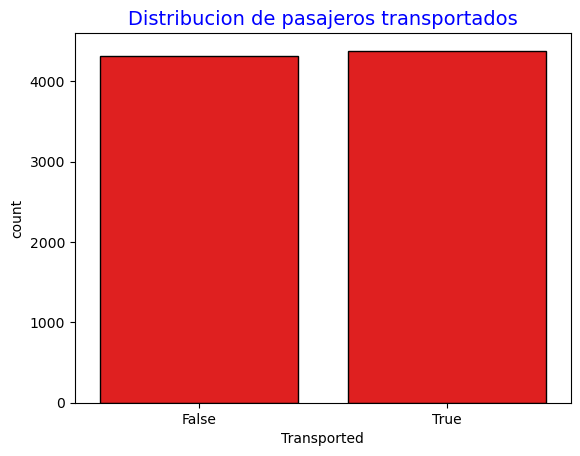

In [13]:
#Distribucion de pasajeros transportados(Esto hace referencia a los muertos(V), vivos(F))
sns.countplot(x='Transported',data=train_data,color='red',edgecolor = 'black')
plt.title('Distribucion de pasajeros transportados',color='blue',fontsize = 14)
plt.show()

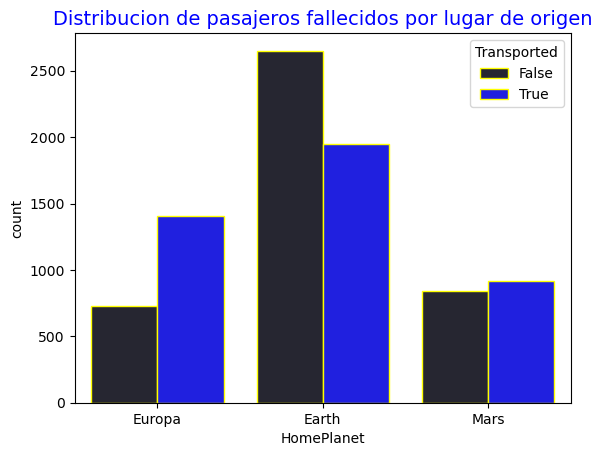

In [15]:
#Distribucion de pasajeros fallecidos respecto al lugar de origen
sns.countplot(x='HomePlanet',hue='Transported',data=train_data,palette='dark:blue',edgecolor='yellow')
plt.title('Distribucion de pasajeros fallecidos por lugar de origen',color='blue',fontsize = 14)
plt.show()

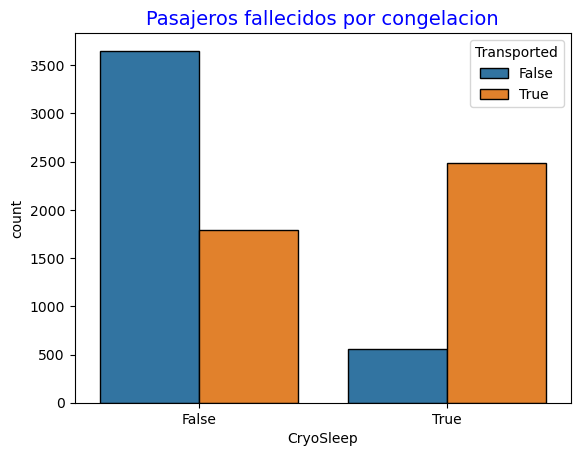

In [17]:
#Distribucion de pasajeros por cabina
sns.countplot(x='CryoSleep',hue='Transported',data=train_data,edgecolor='black')
plt.title('Pasajeros fallecidos por congelacion',fontsize = 14,color= 'blue')
plt.show()

In [19]:
#3.LIMPIEZA DE DATOS

In [21]:
#En la edad,se va a rellenar los valores faltantes con la media
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [23]:
#En homeplanet y destino, se completaran con los datos más comunes
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].mode()[0])

In [25]:
#Eliminar las columnas irrelevantes para el modelo(No los eliminare, considero importante)
train_data = train_data.drop(columns = ['Cabin','Name','PassengerId'])
test_data = test_data.drop(columns = ['Cabin','Name' ,'PassengerId'])

In [27]:
#4.CONVERTIR VARIABLES CATEGORICAS EN VARIABLES DUMMY
#(permite que los modelos de machine learning trabajen con datos 
#categóricos de manera efectiva, evitando problemas como el malentendido 
#de la relación entre las categorías y asegurando que el modelo pueda aprender 
#sobre la influencia específica de cada categoría en el resultado)


In [29]:
# Convertir las variables categóricas en variables dummy
train_data_dummies = pd.get_dummies(train_data, columns=['HomePlanet', 'Destination', 'CryoSleep', 'VIP'])
test_data_dummies = pd.get_dummies(test_data, columns=['HomePlanet', 'Destination', 'CryoSleep', 'VIP'])
# Asegurarse de que las columnas sean las mismas en ambos conjuntos de datos, si en un dataframe tiene una columna que la otra no, 
# se eliminan las columnas, en el dataframe que tenga una columna demás, tienen que ser iguales.
train_data_dummies, test_data_dummies = train_data_dummies.align(test_data_dummies, join='inner', axis=1)
# Asegurar que la columna 'Transported' se mantenga en train_data
train_data_dummies['Transported'] = train_data['Transported'].map({True: 1, False: 0})

In [31]:
#5.SELECCION DE CARACTERISTICA PARA EL MODELO O PREPARAR DATOS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
#Creacion de una lista con toda la data de la columna Transported
features = [col for col in train_data_dummies.columns if col!='Transported']
#X es un DataFrame que contiene las características (features) que se utilizarán para entrenar el modelo.
#X incluye todas las columnas de train_data excepto la columna 'Transported'
X = train_data_dummies[features] #El X recibe toda una lista de 0 y 1, y se pregunta de donde vienen, y analizan las variables dummies
#que fueron antes categoricas y buscan un patron para realizar predicciones.
y = train_data_dummies['Transported'] #Ques es lo que vas a predecir, todo lo que es de Transported
X_test = test_data_dummies[features]

In [35]:
#6.ENTRENAMIENTO DEL MODELO

In [37]:
X_train, x_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
model = RandomForestClassifier(n_estimators = 100,max_depth = 7 , random_state = 1)

In [39]:
#entrenando el modelo
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, random_state=1)

In [41]:
y_pred = model.predict(x_test)

In [43]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Presición del modelo: {accuracy:.2%}')

Presición del modelo: 79.07%


In [45]:
#PREDICCION FINAL

In [49]:
# Hacer predicciones en los datos de prueba
predictions = model.predict(X_test)

# Crear un archivo CSV con los resultados
final = pd.DataFrame({'HomePlanet': test_data['HomePlanet'],'Transported': predictions})
final['Transported'] = final['Transported'].map({1: True, 0: False})  # Convertir de vuelta a booleanos
final.to_csv('Predicciones_Sobrevivientes.csv', index=False)
print("Listo xD")

Listo xD
